In [1]:
import os
import csv
import cv2
from skimage import io
import numpy as np
from skimage.measure import block_reduce, label, regionprops
from skimage.color import label2rgb
import tifffile as tiff
import matplotlib.pyplot as plt
from nd2 import ND2File
from pathlib import Path

from scipy import stats


import pandas as pd


In [2]:
directory = Path('.')

# Get all .nd2 files
csv_files = list(directory.glob("*.csv"))

# If you want full paths as strings:
csv_file_paths = [str(f) for f in csv_files]

In [3]:
csv_file_paths

['ORST_Nuclei_Mito_distances_cd11b_(5uM).csv',
 '24R_control_Nuclei_Mito_distances_cd11b_(5uM).csv',
 '2R_OGD_Nuclei_Mito_distances_cd11b_(5uM).csv',
 '24R_control_Nuclei_Mito_distances_hif1a_(5uM).csv',
 '2R_OGD_Nuclei_Mito_distances_hif1a_(5uM).csv',
 'ORST_Nuclei_Mito_distances_hif1a_(5uM).csv',
 'OGD_only_Nuclei_Mito_distances_hif1a_(5uM).csv',
 '2R_control_Nuclei_Mito_distances_hif1a_(5uM).csv',
 '30mR_control_Nuclei_Mito_distances_cd11b_(5uM).csv',
 '24R_OGD_Nuclei_Mito_distances_hif1a_(5uM).csv',
 'HC_Nuclei_Mito_distances_hif1a_(5uM).csv',
 'HC_Nuclei_Mito_distances_cd11b_(5uM).csv',
 '30mR_control_Nuclei_Mito_distances_hif1a_(5uM).csv',
 '24R_OGD_Nuclei_Mito_distances_cd11b_(5uM).csv',
 'OGD_only_Nuclei_Mito_distances_cd11b_(5uM).csv',
 '2R_control_Nuclei_Mito_distances_cd11b_(5uM).csv']

In [4]:
dfs = []

for csv in csv_file_paths:
    df = pd.read_csv(csv)
    dfs.append(df)

In [58]:
(2+5)/(0.4315)


16.22247972190035

In [60]:
for i, df in enumerate(dfs):

    print(f"Analyzing file {csv_file_paths[i]}")

    df_subset = df[df['distance'] <= 16]

    for j, comp_df in enumerate(dfs):

        comp_subset = comp_df[comp_df['distance'] <= 16]

        x = df_subset['distance']
        y = comp_subset['distance']
        stat, pvalue = (stats.kruskal(x,y))
        if pvalue < 0.05/(16*16):
            print(pvalue)
        else:
            pass

    print()
    


Analyzing file ORST_Nuclei_Mito_distances_cd11b_(5uM).csv
5.245467216378413e-07

Analyzing file 24R_control_Nuclei_Mito_distances_cd11b_(5uM).csv
5.245467216378413e-07
1.8140651768419228e-06
2.2834107728306918e-07
1.8702203801723272e-15
0.00016256270703499738
0.00015768005288798386

Analyzing file 2R_OGD_Nuclei_Mito_distances_cd11b_(5uM).csv
1.312038378162561e-07

Analyzing file 24R_control_Nuclei_Mito_distances_hif1a_(5uM).csv

Analyzing file 2R_OGD_Nuclei_Mito_distances_hif1a_(5uM).csv
2.571503643480158e-07

Analyzing file ORST_Nuclei_Mito_distances_hif1a_(5uM).csv

Analyzing file OGD_only_Nuclei_Mito_distances_hif1a_(5uM).csv
1.8140651768419228e-06

Analyzing file 2R_control_Nuclei_Mito_distances_hif1a_(5uM).csv
2.2834107728306918e-07

Analyzing file 30mR_control_Nuclei_Mito_distances_cd11b_(5uM).csv

Analyzing file 24R_OGD_Nuclei_Mito_distances_hif1a_(5uM).csv
1.8702203801723272e-15
1.312038378162561e-07
2.571503643480158e-07
0.0001230712484096966
3.458688719949163e-08
3.4138821892

In [ ]:

x = dfs[0]['distance']
y = dfs[1]['distance']

stats.kruskal(x, y)

KruskalResult(statistic=np.float64(38.79166248990077), pvalue=np.float64(4.715376260853311e-10))

In [7]:
dfs[0].head()

,Unnamed: 0,nuclei,distance,nuc_centroid_x,nuc_centroid_y,mito_centroid_x,mito_centroid_y
0,0,44,50.788668,128.269171,155.054773,123.461538,205.615385
1,1,51,31.980410,148.440120,503.973054,133.272727,475.818182
2,2,51,51.044791,148.440120,503.973054,140.315789,453.578947
3,3,51,10.304086,148.440120,503.973054,138.500000,506.687500
4,4,53,24.105971,164.879070,320.832558,144.538462,333.769231


In [ ]:
all_prop_df = pd.read_csv("/Users/nelsschimek/Downloads/All_Properties.csv")
all_prop_df.head()

,Unnamed: 0,file_name,known_pyknotic,uid,region_id,i,j,sigma,avg_intensity,weighted_intensity,total_intensity,ideal_radius,eccentricity,perimeter,area,mean_alx568_internal_intensity,classified_pyknotic,Treatment,Treatment_clean
0,1,060225_P10F_4DIV_OR10_OR10_cROT_2ROTonly_F24h_...,NaN,0,59,102,495,3.751074,0.506905,0.466801,19.261371,3.477805,1.000946,21.872369,37.997961,NaN,False,2ROTonly_F24h,2hROTnoOGD_F24h
1,2,060225_P10F_4DIV_OR10_OR10_cROT_2ROTonly_F24h_...,NaN,1,81,141,254,4.785853,0.423662,0.376234,32.827906,4.966344,1.028363,32.089500,77.486038,NaN,False,2ROTonly_F24h,2hROTnoOGD_F24h
2,3,060225_P10F_4DIV_OR10_OR10_cROT_2ROTonly_F24h_...,NaN,2,134,236,382,4.009768,0.456165,0.395869,20.732050,3.803514,1.108936,26.501566,45.448542,NaN,False,2ROTonly_F24h,2hROTnoOGD_F24h
3,4,060225_P10F_4DIV_OR10_OR10_cROT_2ROTonly_F24h_...,NaN,3,262,420,303,3.751074,0.412024,0.365175,19.646857,3.895921,0.988078,24.186967,47.683716,NaN,False,2ROTonly_F24h,2hROTnoOGD_F24h
4,5,060225_P10F_4DIV_OR10_OR10_cROT_2ROTonly_F24h_...,NaN,4,190,303,464,4.268463,0.442085,0.398004,25.691546,4.300980,1.033889,27.939673,58.114529,NaN,False,2ROTonly_F24h,2hROTnoOGD_F24h


<Axes: >

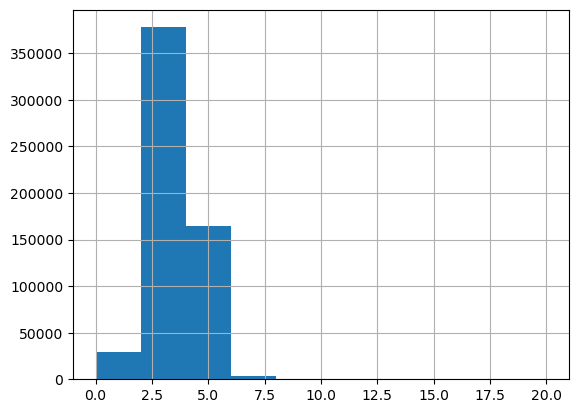

In [20]:
all_prop_df["ideal_radius"].hist(bins=10, range=[0,20])